<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando el Blog de  Hernán Casciari 


[Hernán Casciari](https://hernancasciari.com/#bio), es un escritor argentino, que escribe blog posts con cuentos e historias  relacionadas con el futbol, su vida, infancia, y relaciones familiares con toques de ficción. Este [blog](https://hernancasciari.com/blog/) es  tan interesantes que en 2005 fue premiado como “El mejor blog del mundo” por Deutsche Welle de Alemania. 

El objetivo de este caso-taller es construir un sistema de recomendación basado en los contenidos de los posts utilizando similitud de las palabras usadas o temas de los cuentos.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero."

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

En la carpeta `data` se encuentran el archivo `blog_casciari.csv` con el título, la fecha de publicación, y el contenido de los cuentos publicados en el blog  de sr. Casciari. Cargue estos datos en su *cuaderno* y reporte brevemente el contenido de la base.
   

In [1]:
!pip install wordCloud

In [2]:
import pandas as pd
import numpy as np
import re
import unidecode
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [3]:
dir_blog = "data/blog_casciari.csv"
#dir_blog = "https://raw.githubusercontent.com/paulguz261/MIAD_2024_NO_SUPERVISADO/main/Week6/data/blog_casciari.csv"

df_blog_raw = pd.read_csv(dir_blog)

print("cantidad de blogs: {}".format(df_blog_raw.shape[0]))


prom_cantidad_palabras_blog = np.round(df_blog_raw["cuento"].apply(lambda x: len(x.split())).mean(),0)
std_cantidad_palabras_blog =  np.round(df_blog_raw["cuento"].apply(lambda x: len(x.split())).std(),0)
max_cantidad_palabras_blog =  df_blog_raw["cuento"].apply(lambda x: len(x.split())).max()
min_cantidad_palabras_blog =  df_blog_raw["cuento"].apply(lambda x: len(x.split())).min()

print("cantidad de caracteres en el blogs mas corto: {}".format(min_cantidad_palabras_blog))
print("cantidad promedio de caracteres en los blog: {}".format(prom_cantidad_palabras_blog))
print("desviacion estandar de cantidad de caracteres en los blog: {}".format(std_cantidad_palabras_blog))
print("cantidad de caracteres en el blogs mas largo: {}".format(max_cantidad_palabras_blog))

df_blog_raw.head(2)

cantidad de blogs: 520
cantidad de caracteres en el blogs mas corto: 95
cantidad promedio de caracteres en los blog: 882.0
desviacion estandar de cantidad de caracteres en los blog: 623.0
cantidad de caracteres en el blogs mas largo: 5603


titulo    fecha  \
0            El rincón blanco  1/11/08   
1  Mínimos avances en la cama  1/24/08   

                                              cuento  
0  De pronto yo estaba en el hogar donde pasé la ...  
1  Menos la cama, todo ha mejorado en este mundo....

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

### 2. Homogenización de textos

Para cumplir con el objetivo de generar recomendaciones en esta sección debe preparar los posts para poder ser utilizados en su sistema de recomendación. Para ello, "limpie" y "tokenize" cada uno de los cuentos, describiendo detalladamente los pasos que realizo y si transformó o eliminó ciertas palabras. Para asistirlo en la tarea he creado listas de *stopwords* que están disponibles en la carpeta `data`. En su procedimiento ilustre la limpieza con el cuento 'La venganza del metegol'. (En su limpieza recuerde que el objetivo es generar recomendaciones a partir de la similitud de las palabras o temas de los cuentos)

In [4]:
fltr_venganza_metegol = df_blog_raw["titulo"] == "La venganza del metegol"
print(df_blog_raw.loc[fltr_venganza_metegol,"cuento"].values[:200])

['El mes pasado me invitaron a presentar un libro en Buenos Aires. Y como era un libro sobre fútbol, al final de la charla el director de la editorial nos invitó a jugar un partido de metegol (ese invento español al que sus creadores llaman, erróneamente, futbolín). Hacía años que no jugaba al metegol, pero por suerte me tocó de compañero un filósofo muy prestigioso y pudimos ganar. Nuestros contrincantes eran el autor del libro y el director de la editorial. De los tres, a este último lo conocía desde la juventud.\nJugamos dos partidos enteros y los destrozamos con una facilidad pasmosa: hacía años que no practicaba este falso deporte de muñecas y reflejos, pero descubrí que no había perdido las mañas. Eso me hizo sentir bien: a mi edad cualquier destreza que mantengamos indemne, por más pelotuda que sea, se convierte en una gran noticia.\nDespués de la charla algunos fotógrafos hicieron imágenes del partido de metegol y las subieron a Twitter.\n— Estadio: Librería Gandhi, Buenos Aire

In [5]:
nlp = spacy.load("es_core_news_sm")

# se toman los stopwords sugeridos 
dir_stp1 = 'data/extra_stopwords.csv'
#dir_stp1 = "https://raw.githubusercontent.com/paulguz261/MIAD_2024_NO_SUPERVISADO/main/Week6/data/extra_stopwords.csv?token=GHSAT0AAAAAACXRD5ICYO66TKWXY4CZGSBMZXHCVJQ"
extra_stopwords = pd.read_csv('data/extra_stopwords.csv', sep=',',header=None)
extra_stopwords.columns = ['stopwords']
extra_stopwords=set(extra_stopwords['stopwords'].to_list())

# Agregamos a nuestro modelo de SpaCy
nlp.Defaults.stop_words |= extra_stopwords

# se toman mas stopwords sugeridos 
dir_stp2 = 'data/stopwords_taller.csv'
#dir_stp2 = "https://raw.githubusercontent.com/paulguz261/MIAD_2024_NO_SUPERVISADO/main/Week6/data/stopwords_taller.csv?token=GHSAT0AAAAAACXRD5IC5GAOJM2FBD4Y5JFWZXHCUVQ"
extra_stopwords = pd.read_csv('data/stopwords_taller.csv', sep=',',header=None)
extra_stopwords.columns = ['stopwords']
extra_stopwords=set(extra_stopwords['stopwords'].to_list())

extra_stopwords.add("ano")

nlp.Defaults.stop_words |= extra_stopwords

In [6]:
def limpieza_texto(texto):
    
    # se eliminan los caracteres especiales del español como tildes
    out = unidecode.unidecode(texto)
    # eliminar caracteres de puntuacion puntos, exclamaciones etc
    out = re.sub("[^\\w\\s]|\n", ' ', out)
    # eliminar digitos
    out = re.sub("\d+", "", out)
    # eliminar los espacios extras 
    out = re.sub('\s+', ' ', out)
    out = out.strip()
    # conversion a minuscula 
    out = out.lower()

    out = nlp(out)
    # Filtrar las stopwords y obtener lemmas
    out = [token.lemma_ for token in out if not token.is_stop and len(token) > 2]
    out = " ".join(out)


    # aplicar nuevamente algunas reglas ya que la lematizacion en español añade nuevamente elementos de stopwords y con acentos
    out = unidecode.unidecode(out)

    out = nlp(out)
    # Filtrar las stopwords y obtener lemmas
    out = [token.text for token in out if not token.is_stop and len(token) > 2]
    out = " ".join(out)
    

    return out

In [7]:
lst_blog_clean = list(map(limpieza_texto, df_blog_raw['cuento']))

In [8]:
df_blog_clean = df_blog_raw.copy()
df_blog_clean["cuento_clean"] = lst_blog_clean

In [9]:
fltr_venganza_metegol = df_blog_raw["titulo"] == "La venganza del metegol"
print(df_blog_raw.loc[fltr_venganza_metegol,"cuento"].values[:200])
print(df_blog_clean.loc[fltr_venganza_metegol,"cuento_clean"].values[:200])

['El mes pasado me invitaron a presentar un libro en Buenos Aires. Y como era un libro sobre fútbol, al final de la charla el director de la editorial nos invitó a jugar un partido de metegol (ese invento español al que sus creadores llaman, erróneamente, futbolín). Hacía años que no jugaba al metegol, pero por suerte me tocó de compañero un filósofo muy prestigioso y pudimos ganar. Nuestros contrincantes eran el autor del libro y el director de la editorial. De los tres, a este último lo conocía desde la juventud.\nJugamos dos partidos enteros y los destrozamos con una facilidad pasmosa: hacía años que no practicaba este falso deporte de muñecas y reflejos, pero descubrí que no había perdido las mañas. Eso me hizo sentir bien: a mi edad cualquier destreza que mantengamos indemne, por más pelotuda que sea, se convierte en una gran noticia.\nDespués de la charla algunos fotógrafos hicieron imágenes del partido de metegol y las subieron a Twitter.\n— Estadio: Librería Gandhi, Buenos Aire

como se ve al comparar los dos extractos de texto el proceso de limpieza de datos ha:
- transformado todo a minusculas
- elimina acentos del español 
- elimina signos de puntuacion
- elimina numeros 
- elimina espacios inecesarios, como cuando son mas de dos 
- lemmatiza el texto (esta parte inserta nuevos elementos con acentos y stopwords)
    - vuelve a eliminar acentos del español
    - vuelve a eliminar stopwords

por esta razon la frase pasa de ser: \
El mes pasado me invitaron \
y ahora es: \
mes invitar


### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones de cuentos en el blog a un usuario que leyó 'La venganza del metegol'. Para ello vamos a utilizar distintas estrategias.

#### 3.1. Recomendaciones basadas en contenidos

##### 3.1.1. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para el cuento 'La venganza del metegol' usando en la distancia de coseno donde el texto este vectorizado por `CountVectorizer`. Explique el procedimiento que realizó y como ordenó las recomendaciones.

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
# se inicializa el metodo 
count = CountVectorizer()
# se transforma el texto en la matriz de terminos   
count_matrix = count.fit_transform(df_blog_clean['cuento_clean'])

#Calculamos la matriz de similitud de coseno
cosine_sim = cosine_similarity(count_matrix, count_matrix)

En esta parte el texto se transforma con CountVectorizer que lo que hace es generar una columna por cada palabra de todo el corpus. luego realiza el conteo de coincidencias de cada palabra en cada documento (filas).

Una vez se calcula esta matriz se procede a calcular la smilaridad de coseno consigo misma para lograr encontrar todas las distancias entre todos los documentos.

Con este insumo se puede proceder a calcular las sugerencias para cualquier documento del corpus, para lograrlo se debe:
1. encontrar a que indice corresponde el documento para el cual se quiere calcular la sugerencia.
2. extraer los calculos de distancias de dicho indice
3. ordenar de mayor a menor ignorando la primera coincidencia que es consigo misma
4. seleccionar los indices de los k primeros valores 
5. mostrar los cuentos que corresponden a dichos indices

In [12]:
def top_k_recomendaciones(titulo, matriz_pesos, df, k):
        
    # encontrar ubicacion del titulo
    fltr_venganza_metegol = df["titulo"] == titulo
    indx_cuento = np.argmax(fltr_venganza_metegol)

    # determinar la cantidad de sugerencias
    n_sugerencias = k
    # tomar la matriz que tiene los criterios de decision y obtener el top de indices
    top_sugerencias = np.argsort(matriz_pesos[indx_cuento])[-n_sugerencias-1:-1]

    # encontrar las sugerencias en el blog original ordernar de mayor a menor exluyendo el primer resultado que es la medida consigo mismo
    sugerencias = df_blog_clean.iloc[top_sugerencias,:][::-1]


    return sugerencias

In [13]:
titulo = "La venganza del metegol"
recomendaciones_cv = top_k_recomendaciones(titulo, cosine_sim, df_blog_clean, 5)
recomendaciones_cv

titulo     fecha  \
17   Cuento con bruja y tramontina   8/29/08   
5        El milagro de los pueblos   4/22/08   
121                  Gaussian blur  10/10/13   
159     Pajaritos en jaula gigante  11/10/15   
130      El horrible día dieciséis   6/29/14   

                                                cuento  \
17   Íbamos en un taxi por la avenida Álvarez Thoma...   
5    Cuando nació la Nina no tuve ganas de escribir...   
121  Estoy en San José de Costa Rica y llueve. Acab...   
159  Mi pueblo natal se llama Mercedes, está en una...   
130  La buena noticia es que Argentina clasificó co...   

                                          cuento_clean  
17   ibar taxi avenida alvarez thoma llegar esquina...  
5    nacio nina gana escribir descubrimiento patern...  
121  san rico llover acabar pedir cafe abrir portat...  
159  pueblo natal llamar merced llanura verde provi...  
130  noticia argentina clasifico punto jugar martes...

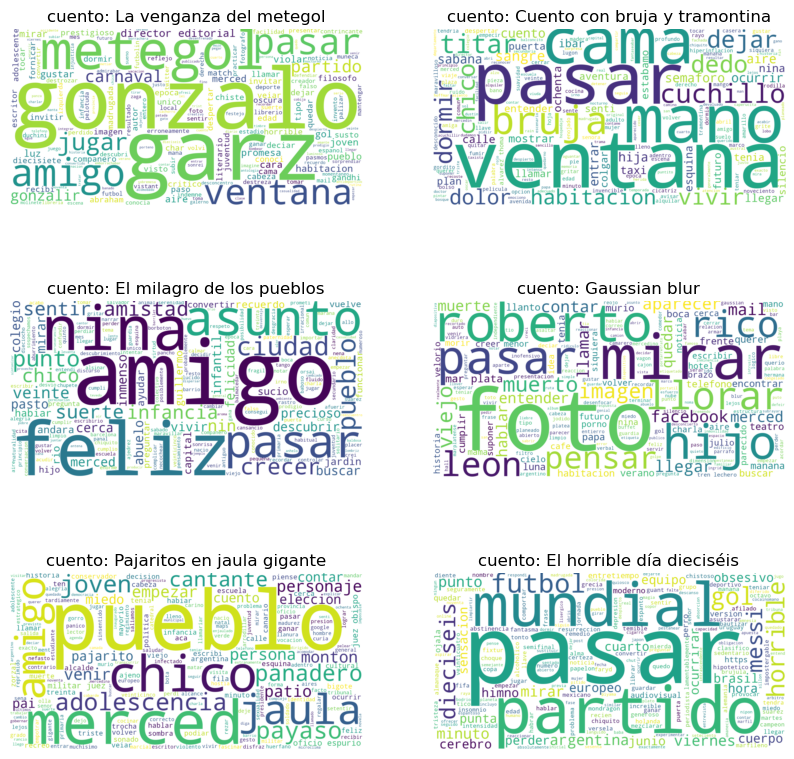

In [14]:
fltr_venganza_metegol = df_blog_clean["titulo"] == titulo

fig, ax = plt.subplots(3,2,figsize=(10,10))
axs = ax.flatten()
wordcloud = WordCloud(width = 1600, height = 800, 
    background_color = "white").generate(df_blog_clean.loc[fltr_venganza_metegol,"cuento_clean"].values[0])
axs[0].imshow(wordcloud, interpolation = 'bilinear')
axs[0].axis("off")
axs[0].set_title("cuento: {}".format("La venganza del metegol"))

for i in np.arange(0,5):
    wordcloud = WordCloud(width = 1600, height = 800, 
        background_color = "white").generate(recomendaciones_cv.iloc[i]["cuento_clean"])
    axs[i+1].imshow(wordcloud, interpolation = 'bilinear')
    axs[i+1].axis("off")
    axs[i+1].set_title("cuento: {}".format(recomendaciones_cv.iloc[i]["titulo"]))

plt.show()

Al ver el mapa de palabras vemos que una de las palabras que hace que exista una alta relacion entre los cuentos son las palabras **PASAR**  y **AMiGO** esto sucede ya que el metodo de pesos utilizado es el conoteo de coincidencias de cada palabra en cada documento, realmente sin leer los cuentos no hay forma de establecer si la relacion existente es adecuada o no.

##### 3.1.2. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para  el cuento 'La venganza del metegol' usando nuevamente la distancia de coseno, pero ahora vectorice el texto usando `TF-IDFVectorizer`. Explique el procedimiento que realizó y como ordenó las recomendaciones. Compare con los resultados del punto anterior y explique sus similitudes y/o diferencias.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

para el calculo de pesos de cada palabra aplicamos tf-idf asi encontramos la importancia de la palabra en el documento respecto a la cantidad de veces que aparece en todo el corpus. una vez obtenemos esta medida para cada palabra de cada documento en todo el corpus procedemos a calcular la distancia de coseno. 

Dado que vectorizamos TF-IDF, la norma de estos siempre será 1. Esto simplifica el cómputo de la disimilaridad de coseno ya que se resume a calcular el producto punto.

In [16]:
#Definimos el objeto TF-IDF Vectorizer Object
tfidf = TfidfVectorizer()

#Construimos la matriz TF-IDF
tfidf_matrix = tfidf.fit_transform(df_blog_clean["cuento_clean"])

# crea un Dataframe para la visualizacion
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Calculamos el producto punto para obtener la similaridad coseno
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

al estar buscando nuevamente el valor maximo de la similaridad de coseno entre los documentos, los pasos a seguir son los mismos descritos anteriormente:

1. encontrar a que indice corresponde el documento para el cual se quiere calcular la sugerencia.
2. extraer los calculos de distancias de dicho indice
3. ordenar de mayor a menor ignorando la primera coincidencia que es consigo misma
4. seleccionar los indices de los k primeros valores 
5. mostrar los cuentos que corresponden a dichos indices

para aplicar este procedimiento se utiliza a funcion declarada para el punto anterior

In [17]:
titulo = "La venganza del metegol"
recomendaciones_tfidf = top_k_recomendaciones(titulo, cosine_sim, df_blog_clean, 5)
recomendaciones_tfidf

titulo     fecha  \
17                     Cuento con bruja y tramontina   8/29/08   
121                                    Gaussian blur  10/10/13   
519                 La madre de todas las desgracias  12/13/07   
138  Nueve libros que me hicieron olvidar el Mundial   7/16/14   
414        La desgracia venía en sobres papel madera   4/27/06   

                                                cuento  \
17   Íbamos en un taxi por la avenida Álvarez Thoma...   
121  Estoy en San José de Costa Rica y llueve. Acab...   
519  Los que vivimos tan lejos, con un Atlántico en...   
138  Dos meses antes de la Copa del Mundo, cuando v...   
414  Desde los tres años de edad empecé a desarroll...   

                                          cuento_clean  
17   ibar taxi avenida alvarez thoma llegar esquina...  
121  san rico llover acabar pedir cafe abrir portat...  
519  vivir lejos atlantico tema tabu aterrar sacar ...  
138  mes copa vivir respirar facil apareciar sueno ...  
414  edad empece desarrollar patologia extrana perv...

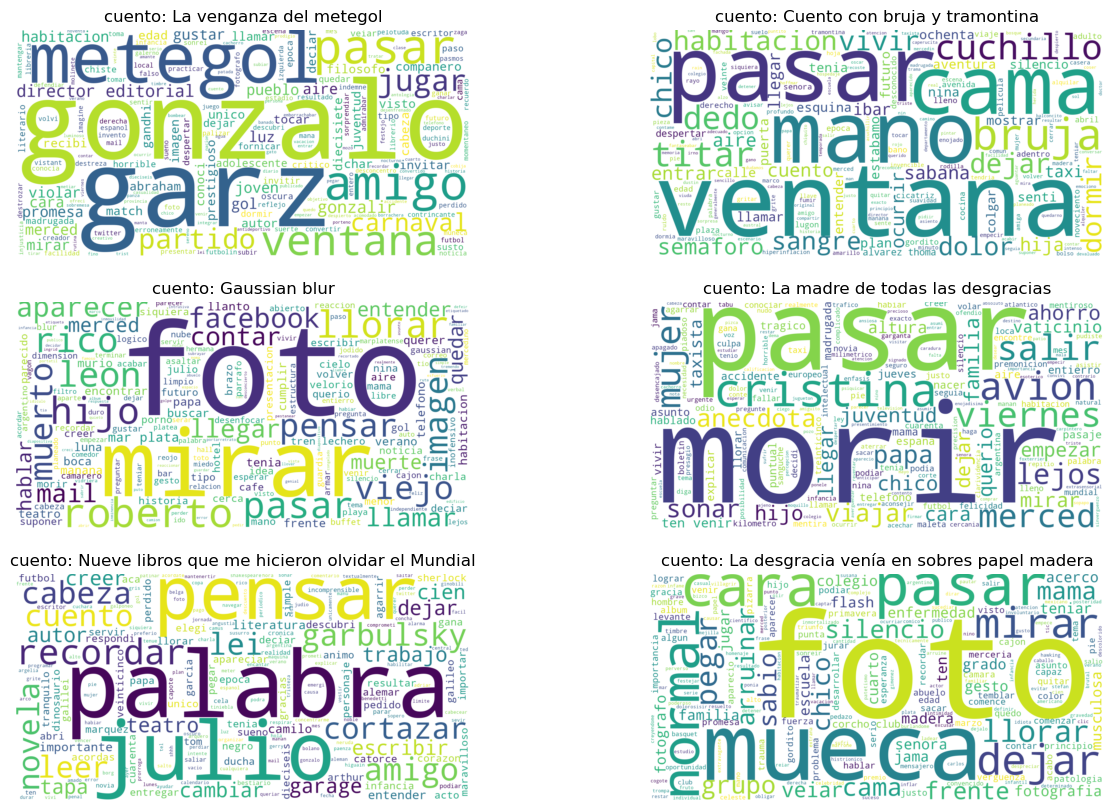

In [18]:
fltr_venganza_metegol = df_blog_clean["titulo"] == titulo

fig, ax = plt.subplots(3,2,figsize=(15,10))
axs = ax.flatten()
wordcloud = WordCloud(width = 1600, height = 800, 
    background_color = "white").generate(df_blog_clean.loc[fltr_venganza_metegol,"cuento_clean"].values[0])
axs[0].imshow(wordcloud, interpolation = 'bilinear')
axs[0].axis("off")
axs[0].set_title("cuento: {}".format("La venganza del metegol"))

for i in np.arange(0,5):
    wordcloud = WordCloud(width = 1600, height = 800, 
        background_color = "white").generate(recomendaciones_tfidf.iloc[i]["cuento_clean"])
    axs[i+1].imshow(wordcloud, interpolation = 'bilinear')
    axs[i+1].axis("off")
    axs[i+1].set_title("cuento: {}".format(recomendaciones_tfidf.iloc[i]["titulo"]))

plt.show()

In [19]:
compare_recomendaciones = pd.concat([recomendaciones_cv.reset_index()[["titulo"]],recomendaciones_tfidf.reset_index()[["titulo"]]], axis=1)
compare_recomendaciones.columns = ["countVectorizer","TF-Idf"]
compare_recomendaciones

countVectorizer  \
0  Cuento con bruja y tramontina   
1      El milagro de los pueblos   
2                  Gaussian blur   
3     Pajaritos en jaula gigante   
4      El horrible día dieciséis   

                                            TF-Idf  
0                    Cuento con bruja y tramontina  
1                                    Gaussian blur  
2                 La madre de todas las desgracias  
3  Nueve libros que me hicieron olvidar el Mundial  
4        La desgracia venía en sobres papel madera

Algunos cuentos permanecen como Cuento con bruja y tramontina y Gaussian blur, lo que nos dice que no solo tienen una alta relacion de palabras usadas (1er metodo) si no que tambien utilizan palabras que son unicas entre estos documentos, lo cual haria que sus topicos son similares.

Por otra parte aparecen nuevos textos en la sugerencia por Tf-Idf, si bien se gráfica la nube de palabras, por la misma naturaleza del metodo puede que las palabras que hecen "singular" a un tema no aparezcan con tanta frecuencia en cada documento.

Sin embargo si nos guiamos por las nubes de palabras vemos que aparece con mayor fuerza el termino de foto y fotografia

Este metodo muestra sugerencias distintas a las vistas anteriormente y esto se debe a que tf-idf ayuda a encontrar temas mas particulares de cada texto

##### 3.1.3. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para el cuento 'La venganza del metegol' usando el texto vectorizado por `TF-IDFVectorizer` y la correlación como medida de similitud. Explique el procedimiento que realizó y como ordenó las recomendaciones. Compare con los resultados de los puntos anteriores y explique sus similitudes y/o diferencias.

Realmente para este metodo se utilizara la misa preparacion de los datos, en el calculo de tf-dif, pero su principal diferencia radica en que se utilizara la correlacion para encontrar una medida de similitud entre documentos, a diferencia de la similitud de coseno en el punto anterior.
luego de calcular la correlacion, para encontrar una recomendacion se seguiran los siguientes pasos 

1. encontrar a que indice corresponde el documento para el cual se quiere calcular la sugerencia.
2. extraer los calculos de distancias de dicho indice
3. ordenar de mayor a menor ignorando la primera coincidencia que es consigo misma
4. seleccionar los indices de los k primeros valores 
5. mostrar los cuentos que corresponden a dichos indices

este es el mismo procedimiento que es utlizo en los puntos anteriores por lo tanto se puede utilizar la misma funcion que definimos mas arriba


In [20]:
# calculo de la correlacion entre los documentos
corr_matrix = np.corrcoef(df_tfidf.values)

In [21]:
titulo = "La venganza del metegol"
# aplicar el metodo anterior, utilizando la nueva matriz de similitud corr_matrix
recomendaciones_tfidf_corr = top_k_recomendaciones(titulo, corr_matrix, df_blog_clean, 5)
recomendaciones_tfidf_corr

titulo     fecha  \
17      Cuento con bruja y tramontina   8/29/08   
121                     Gaussian blur  10/10/13   
5           El milagro de los pueblos   4/22/08   
519  La madre de todas las desgracias  12/13/07   
130         El horrible día dieciséis   6/29/14   

                                                cuento  \
17   Íbamos en un taxi por la avenida Álvarez Thoma...   
121  Estoy en San José de Costa Rica y llueve. Acab...   
5    Cuando nació la Nina no tuve ganas de escribir...   
519  Los que vivimos tan lejos, con un Atlántico en...   
130  La buena noticia es que Argentina clasificó co...   

                                          cuento_clean  
17   ibar taxi avenida alvarez thoma llegar esquina...  
121  san rico llover acabar pedir cafe abrir portat...  
5    nacio nina gana escribir descubrimiento patern...  
519  vivir lejos atlantico tema tabu aterrar sacar ...  
130  noticia argentina clasifico punto jugar martes...

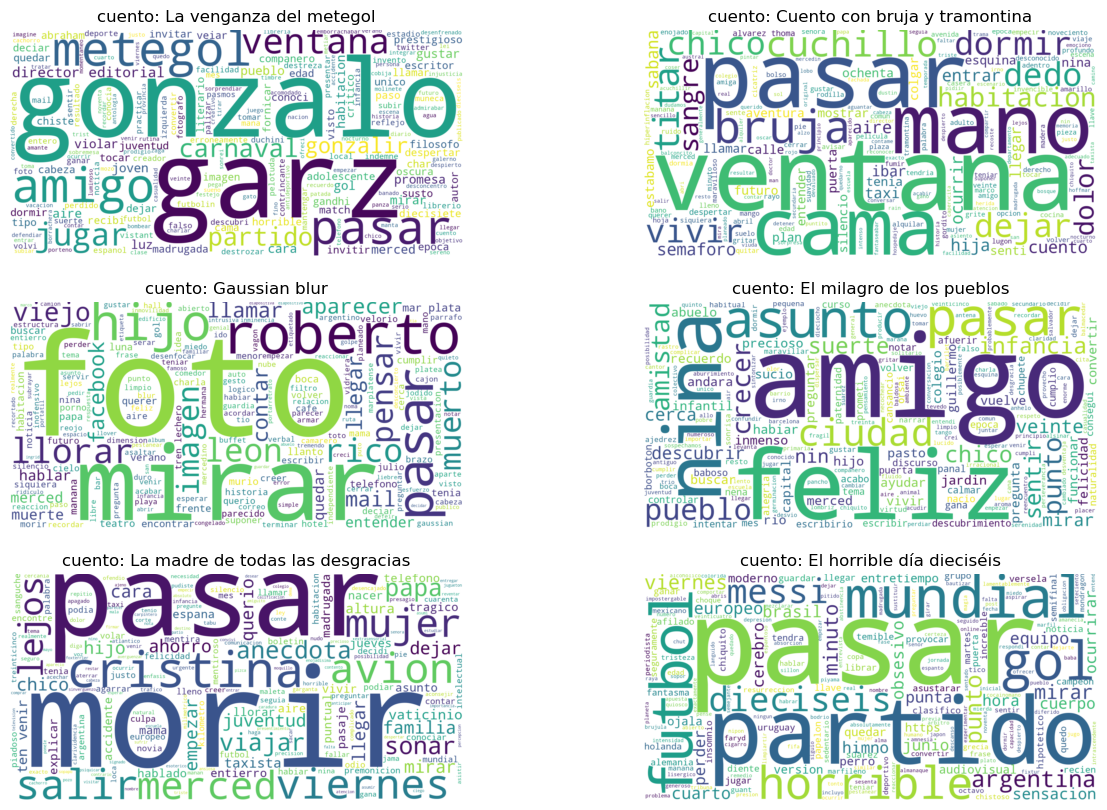

In [22]:
fltr_venganza_metegol = df_blog_clean["titulo"] == titulo

fig, ax = plt.subplots(3,2,figsize=(15,10))
axs = ax.flatten()
wordcloud = WordCloud(width = 1600, height = 800, 
    background_color = "white").generate(df_blog_clean.loc[fltr_venganza_metegol,"cuento_clean"].values[0])
axs[0].imshow(wordcloud, interpolation = 'bilinear')
axs[0].axis("off")
axs[0].set_title("cuento: {}".format("La venganza del metegol"))

for i in np.arange(0,5):
    wordcloud = WordCloud(width = 1600, height = 800, 
        background_color = "white").generate(recomendaciones_tfidf_corr.iloc[i]["cuento_clean"])
    axs[i+1].imshow(wordcloud, interpolation = 'bilinear')
    axs[i+1].axis("off")
    axs[i+1].set_title("cuento: {}".format(recomendaciones_tfidf_corr.iloc[i]["titulo"]))

plt.show()

In [23]:
compare_recomendaciones = pd.concat([recomendaciones_cv.reset_index()[["titulo"]],
                                     recomendaciones_tfidf.reset_index()[["titulo"]],
                                     recomendaciones_tfidf_corr.reset_index()[["titulo"]]], axis=1)
compare_recomendaciones.columns = ["countVectorizer","TF-Idf","TF-Idf_correlacion"]
compare_recomendaciones

countVectorizer  \
0  Cuento con bruja y tramontina   
1      El milagro de los pueblos   
2                  Gaussian blur   
3     Pajaritos en jaula gigante   
4      El horrible día dieciséis   

                                            TF-Idf  \
0                    Cuento con bruja y tramontina   
1                                    Gaussian blur   
2                 La madre de todas las desgracias   
3  Nueve libros que me hicieron olvidar el Mundial   
4        La desgracia venía en sobres papel madera   

                 TF-Idf_correlacion  
0     Cuento con bruja y tramontina  
1                     Gaussian blur  
2         El milagro de los pueblos  
3  La madre de todas las desgracias  
4         El horrible día dieciséis

seguimos viendo cuentos que aparecen en todas las opciones como **Cuento con bruja y tramontina** y **Gaussian blur** estos textos parecen ser las mejores sugerencias ya que han estado presentes en todos los metodos de sugerencias realizados.

vemos diferencias entre los titulos usando tf-idf con similaridad de coseno y con correlacion y es aqui donde vemos la importancia de utilizar una medida u otra para determinar la relacion entre documentos. La similaridad de coseno me dice que tan cerca estan los documentos es decir si sus pesos son similares, mientras que la correlacion nos permite saber si a pesar de no tener las mismas magnitudes los pesos "se mueven" en la misma direccion, en caso de estar correlacionados nos puede indicar que tratan de temas similares.

##### 3.2. Recomendaciones basadas en temas

Usando modelado de temas con LDA, encuentre los temas subyacentes en el blog. Explique como eligió el numero óptimo de temas. Utilizando el tema asignado al cuento 'La venganza del metegol' y la probabilidad de pertenecer a este tema genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para este cuento. Explique el procedimiento que realizó. Compare con los resultados encontrados anteriormente y explique sus similitudes y/o diferencias. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [24]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from pprint import pprint
from gensim.models import CoherenceModel
from gensim.models.ldamulticore import LdaMulticore

In [25]:
# se crea el diccionario de palabras con los cuentos limpios
dictionary = Dictionary(df_blog_clean["cuento_clean"].str.split())

# se eliminan las palabras mas comunes ya que no nos brinda valor por estar presente en todos los documentos, asi mismo se eliminan las menos comunes ya que serán demasiado particulares como para darnos una relacion con otro documento
dictionary.filter_extremes(no_below=20, no_above=0.5)

# se determina de cuantas palabras se componen el corpus a partir del filtrado anterior
corpus = [dictionary.doc2bow(doc) for doc in df_blog_clean["cuento_clean"].str.split()]
print('Numero de palabras únicas: %d' % len(dictionary))

Numero de palabras únicas: 1215


Para seleccionar la cantidad de temas se pueden aplicar dos metodologias una es la de maximizar la metrica de coherencia y la segunda es la de minimizar la medida de perplejidad, para este caso se aplicaran ambas

In [26]:
# funcion para calcular la metrica de coherencia y perplejidad para distintas iteraciones de temas
def calcular_coherencia_perplejidad_ntemas(dictionary, corpus, texts, start=1, limit=10, step=1):
 
    coherence_values = []
    perplejidad_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus,
                        id2word=dictionary,
                        num_topics=num_topics, 
                        random_state=123,
                        passes=20)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

        perplejidad_values.append(np.exp2(-model.log_perplexity(corpus)))

    return model_list, coherence_values, perplejidad_values

In [27]:
# definicion de parametros y se aplica la funcion
inicio = 1
limite = 15
paso = 1
modelos, valores_c, valores_p = calcular_coherencia_perplejidad_ntemas(dictionary=dictionary, corpus=corpus, texts=df_blog_clean["cuento_clean"].str.split(), start=inicio, limit=limite, step=paso)

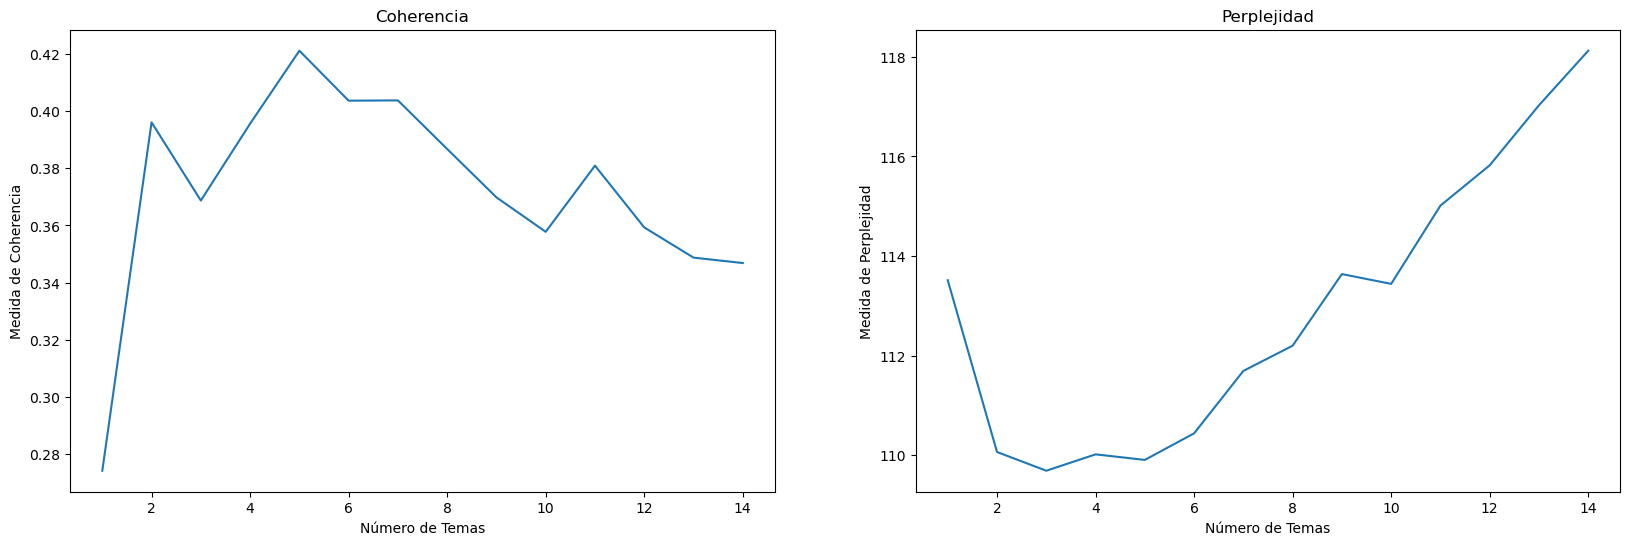

In [28]:
# Grafica de la coherencia
fig, ax = plt.subplots(1,2, figsize=(20,6))
axs = ax.flatten()

x = range(inicio, limite, paso)
axs[0].plot(x, valores_c)
axs[0].set_xlabel("Número de Temas")
axs[0].set_ylabel("Medida de Coherencia")
axs[0].set_title("Coherencia")

x = range(inicio, limite, paso)
axs[1].plot(x, valores_p)
axs[1].set_xlabel("Número de Temas")
axs[1].set_ylabel("Medida de Perplejidad")
axs[1].set_title("Perplejidad")

plt.show()

In [29]:
print("order mayor a menor coherencia")
[x[i] for i in np.argsort(valores_c)[::-1]]

order mayor a menor coherencia


[5, 7, 6, 2, 4, 8, 11, 9, 3, 12, 10, 13, 14, 1]

In [30]:
print("order menor a mayor perplejiadd")
[x[i] for i in np.argsort(valores_p)]

order menor a mayor perplejiadd


[3, 5, 4, 2, 6, 7, 8, 10, 1, 9, 11, 12, 13, 14]

En este caso 5 topicos parecen la mejor opcion, esta en el maximo de coherencia y es la segunda medida mas baja en perplejidad, a continuacion se crea el modelo y se imprimen los topicos encontrados

In [31]:
model = LdaMulticore(corpus=corpus,
                        id2word=dictionary,
                        num_topics=5, 
                        random_state=123,
                        passes=20)

In [32]:
model.print_topics()

[(0,
  '0.018*"viejo" + 0.008*"sueno" + 0.007*"empezar" + 0.007*"salir" + 0.007*"chico" + 0.007*"pensar" + 0.006*"llorar" + 0.006*"venir" + 0.006*"hija" + 0.006*"sacar"'),
 (1,
  '0.010*"mujer" + 0.007*"llegar" + 0.007*"mano" + 0.006*"amigo" + 0.006*"pensar" + 0.006*"puerta" + 0.005*"cabeza" + 0.005*"hombre" + 0.005*"pueblo" + 0.005*"querer"'),
 (2,
  '0.031*"caio" + 0.025*"zacaria" + 0.020*"nacho" + 0.017*"sofi" + 0.012*"zacarias" + 0.012*"hijo" + 0.010*"nonno" + 0.009*"americo" + 0.009*"don" + 0.009*"marido"'),
 (3,
  '0.016*"argentino" + 0.011*"mundial" + 0.011*"pais" + 0.011*"futbol" + 0.009*"partido" + 0.009*"espana" + 0.008*"hombre" + 0.007*"gol" + 0.007*"ocurrir" + 0.006*"argentina"'),
 (4,
  '0.014*"escribir" + 0.009*"foto" + 0.008*"llamar" + 0.007*"amigo" + 0.007*"leer" + 0.007*"historia" + 0.006*"palabra" + 0.006*"persona" + 0.006*"lector" + 0.005*"blog"')]

In [33]:
# for word,idx in dictionary.token2id.items():
#     print(word,idx)

Ahora se han de encontrar las recomendaciones, primero se crea un DataFrame que contiene para todos los documents la probabilidad de pertenceer a uno de los topicos anteriores. Con este insumo se puede encontrar sugerencias de dos formas.

1. se encuenrta el topico mas probable para un titulo, 
    - luego el resto se ordenan de mayor a menor por este topico 
    - se excluye el score del titutlo inicial
    - se selecciona el top k mayor

2. se encuentran los topicos del titulo, luego se crea un "score" 
    - se toman las probabilidades de los topicos del titulo inicial
    - se usan para ponderar los valores de los mismos topicos del resto de documentos
    - estos valores ponderados se suman para crear el score
    - se ordenan de mayor a menor
    - se excluye el score del titutlo inicial
    - se seleccionan los k mas importantes

sumando unicamente los pesos de estos topicos para cada documento, finalmente se seleccionan de mayora menor los k documentos con el puntaje mas alto

In [34]:
# traer las probablidades de cada documento para los topicos
l=[model.get_document_topics(item) for item in corpus]
# crea una nueva estructura mas amigable para crear un dataframe
dicts_topicos = [{k: v for k, v in row} for row in l]

# crea el dataframe de las probabilidades
df_proba_topicos_lda = pd.DataFrame(dicts_topicos)
df_proba_topicos_lda

1         4         0         3         2
0    0.845050  0.153411       NaN       NaN       NaN
1    0.645266  0.096778  0.114299  0.142836       NaN
2    0.282986  0.632032       NaN       NaN  0.075496
3    0.210065  0.787836       NaN       NaN       NaN
4    0.148769  0.725556  0.120304       NaN       NaN
..        ...       ...       ...       ...       ...
515  0.391086  0.578704       NaN  0.028605       NaN
516  0.051916  0.946359       NaN       NaN       NaN
517       NaN  0.013861       NaN  0.984014       NaN
518  0.599647  0.289895       NaN  0.108864       NaN
519  0.441723  0.265191  0.082821  0.203407       NaN

[520 rows x 5 columns]

##### Metodo 1

In [35]:
# encontrar el titulo
fltr_venganza_metegol = df_blog_clean["titulo"] == titulo
# encontrar el indice del titulo
idx_titulo = fltr_venganza_metegol.idxmax()
# encontrar el topico del titulo con la mayor probabilidad
num_topico = df_proba_topicos_lda.iloc[idx_titulo,:].idxmax()
print("topico del titulo {}".format(num_topico))
print(model.print_topics()[num_topico])

# ordenar de mayor a meno, excluir la probabilidad del titulo inicial y obteer el top 5 de sugerencias
idx_sugerencias_lda = df_proba_topicos_lda.sort_values(by=num_topico, ascending=False).drop(index=idx_titulo).index[:5].values
# mostrar el top de sugerencias
recomendaciones_lda1 = df_blog_clean.iloc[idx_sugerencias_lda]
recomendaciones_lda1

topico del titulo 1
(1, '0.010*"mujer" + 0.007*"llegar" + 0.007*"mano" + 0.006*"amigo" + 0.006*"pensar" + 0.006*"puerta" + 0.005*"cabeza" + 0.005*"hombre" + 0.005*"pueblo" + 0.005*"querer"')


titulo    fecha  \
6                       Ropa sucia   5/6/08   
140     La estrategia del banderín  8/14/14   
17   Cuento con bruja y tramontina  8/29/08   
514           Los cuatro albañiles   8/9/07   
382    Una docena de tortas negras  5/19/05   

                                                cuento  \
6    Ya de entrada caí mal parado. Vine al mundo ju...   
140  Hoy se cumplen veinte años de la peor desgraci...   
17   Íbamos en un taxi por la avenida Álvarez Thoma...   
514  Durante mi primera suplencia periodística me h...   
382  Miró a las tres mujeres que esperaban que cort...   

                                          cuento_clean  
6    entrada cai parado venir justo pobre costumbre...  
140  cumplir veinte desgracia juventud hora contar ...  
17   ibar taxi avenida alvarez thoma llegar esquina...  
514  suplencia periodistico trabajar verano podiar ...  
382  mirar mujer esperar cortasar semaforo morocha ...

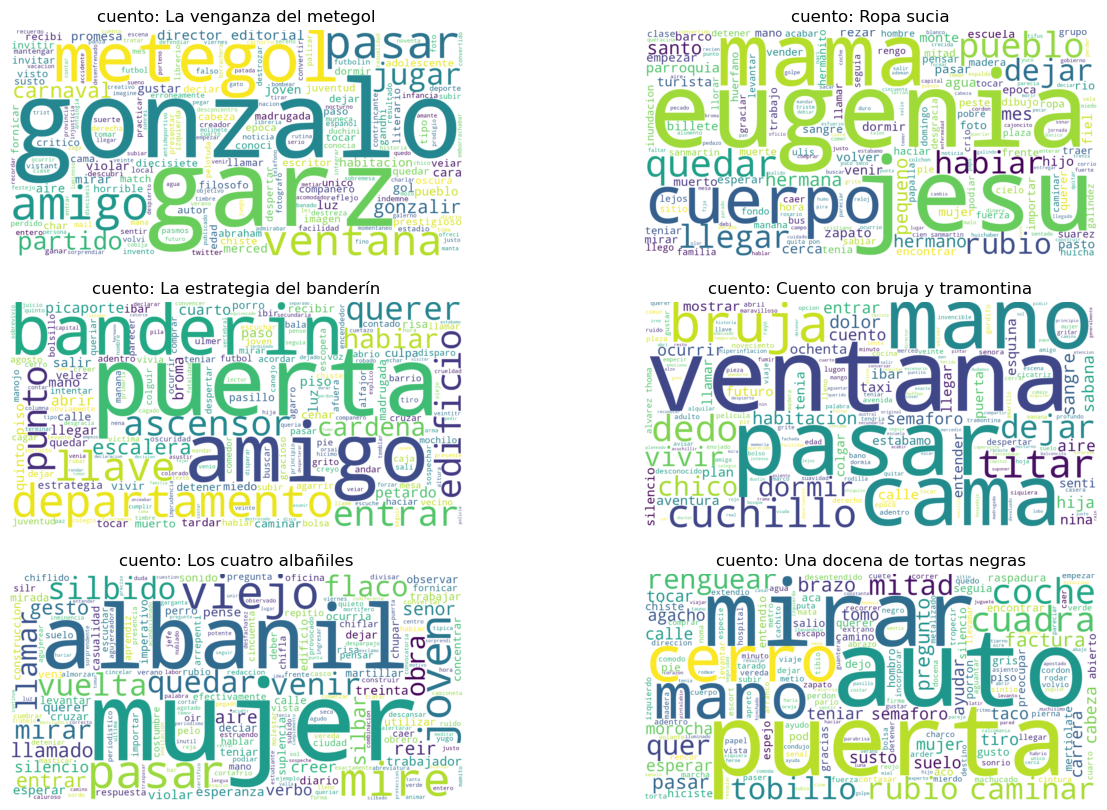

In [37]:
fltr_venganza_metegol = df_blog_clean["titulo"] == titulo

fig, ax = plt.subplots(3,2,figsize=(15,10))
axs = ax.flatten()
wordcloud = WordCloud(width = 1600, height = 800, 
    background_color = "white").generate(df_blog_clean.loc[fltr_venganza_metegol,"cuento_clean"].values[0])
axs[0].imshow(wordcloud, interpolation = 'bilinear')
axs[0].axis("off")
axs[0].set_title("cuento: {}".format("La venganza del metegol"))

for i in np.arange(0,5):
    wordcloud = WordCloud(width = 1600, height = 800, 
        background_color = "white").generate(recomendaciones_lda1.iloc[i]["cuento_clean"])
    axs[i+1].imshow(wordcloud, interpolation = 'bilinear')
    axs[i+1].axis("off")
    axs[i+1].set_title("cuento: {}".format(recomendaciones_lda1.iloc[i]["titulo"]))

plt.show()

##### Metodo 2

In [38]:
# encontrar indices del titulo  
fltr_venganza_metegol = df_blog_clean["titulo"] == titulo
idx_titulo = fltr_venganza_metegol.idxmax()

# encuentra todos los topicos asociados al titulo
fltr_condicion = df_proba_topicos_lda.iloc[idx_titulo,:].isna()
topicos_titulo = df_proba_topicos_lda.columns[~fltr_condicion]
print("topicos del titulo {}".format(topicos_titulo.values))
for t in topicos_titulo:
    print(model.print_topics()[t])

# calculo del score
# pondera los puntajes de los topicos para el resto de documentos con los valores encontados para los topicos del titulo inicial 
proba_ponderadas = df_proba_topicos_lda.loc[:,topicos_titulo] * df_proba_topicos_lda.loc[idx_titulo,topicos_titulo]
# elimina la fila que corresponde a los valores del titulo inicial
proba_ponderadas = proba_ponderadas.drop(index=idx_titulo)

# suma los valores ponderados por cada documento, los ordena de mayor a menor y obtiene el top 5
idx_sugerencias_lda = proba_ponderadas.sum(axis=1).sort_values(ascending=False)[:5].index

# muestra las recomendaciones
recomendaciones_lda2 = df_blog_clean.iloc[idx_sugerencias_lda,:]
recomendaciones_lda2

topicos del titulo [1 4 3]
(1, '0.010*"mujer" + 0.007*"llegar" + 0.007*"mano" + 0.006*"amigo" + 0.006*"pensar" + 0.006*"puerta" + 0.005*"cabeza" + 0.005*"hombre" + 0.005*"pueblo" + 0.005*"querer"')
(4, '0.014*"escribir" + 0.009*"foto" + 0.008*"llamar" + 0.007*"amigo" + 0.007*"leer" + 0.007*"historia" + 0.006*"palabra" + 0.006*"persona" + 0.006*"lector" + 0.005*"blog"')
(3, '0.016*"argentino" + 0.011*"mundial" + 0.011*"pais" + 0.011*"futbol" + 0.009*"partido" + 0.009*"espana" + 0.008*"hombre" + 0.007*"gol" + 0.007*"ocurrir" + 0.006*"argentina"')


titulo    fecha  \
6                       Ropa sucia   5/6/08   
140     La estrategia del banderín  8/14/14   
17   Cuento con bruja y tramontina  8/29/08   
514           Los cuatro albañiles   8/9/07   
382    Una docena de tortas negras  5/19/05   

                                                cuento  \
6    Ya de entrada caí mal parado. Vine al mundo ju...   
140  Hoy se cumplen veinte años de la peor desgraci...   
17   Íbamos en un taxi por la avenida Álvarez Thoma...   
514  Durante mi primera suplencia periodística me h...   
382  Miró a las tres mujeres que esperaban que cort...   

                                          cuento_clean  
6    entrada cai parado venir justo pobre costumbre...  
140  cumplir veinte desgracia juventud hora contar ...  
17   ibar taxi avenida alvarez thoma llegar esquina...  
514  suplencia periodistico trabajar verano podiar ...  
382  mirar mujer esperar cortasar semaforo morocha ...

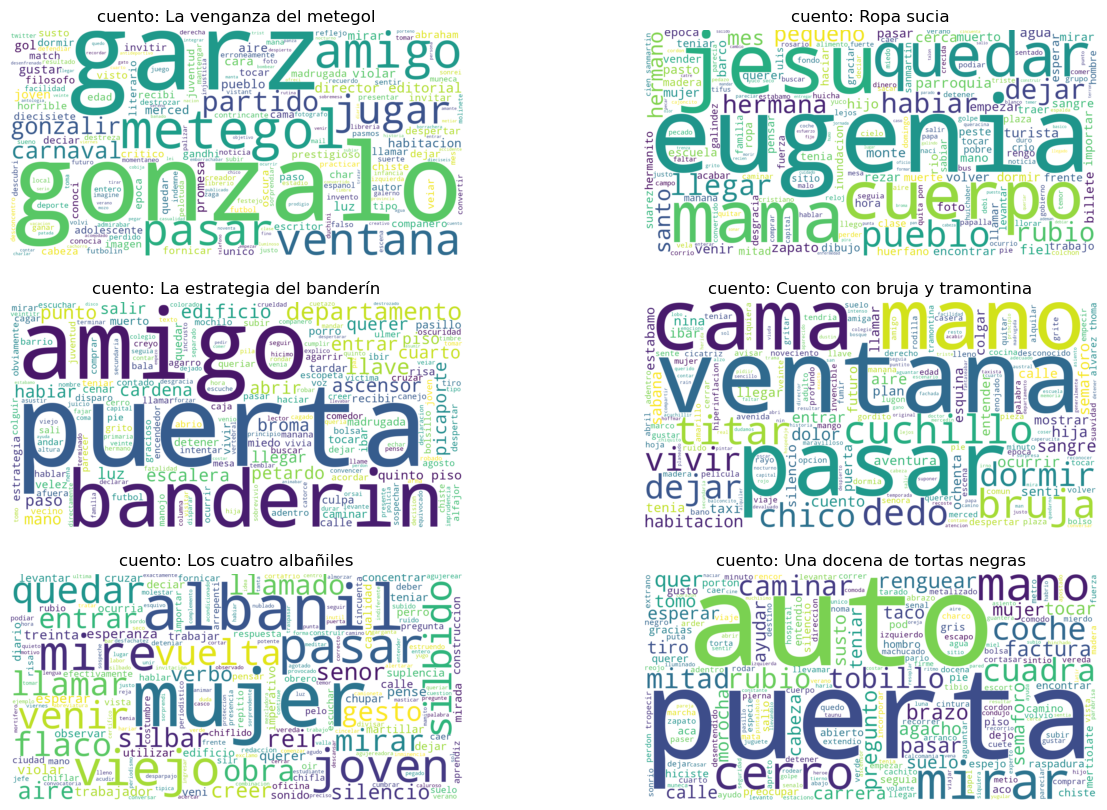

In [39]:
fltr_venganza_metegol = df_blog_clean["titulo"] == titulo

fig, ax = plt.subplots(3,2,figsize=(15,10))
axs = ax.flatten()
wordcloud = WordCloud(width = 1600, height = 800, 
    background_color = "white").generate(df_blog_clean.loc[fltr_venganza_metegol,"cuento_clean"].values[0])
axs[0].imshow(wordcloud, interpolation = 'bilinear')
axs[0].axis("off")
axs[0].set_title("cuento: {}".format("La venganza del metegol"))

for i in np.arange(0,5):
    wordcloud = WordCloud(width = 1600, height = 800, 
        background_color = "white").generate(recomendaciones_lda2.iloc[i]["cuento_clean"])
    axs[i+1].imshow(wordcloud, interpolation = 'bilinear')
    axs[i+1].axis("off")
    axs[i+1].set_title("cuento: {}".format(recomendaciones_lda2.iloc[i]["titulo"]))

plt.show()

In [40]:
compare_recomendaciones = pd.concat([recomendaciones_cv.reset_index()[["titulo"]],
                                     recomendaciones_tfidf.reset_index()[["titulo"]],
                                     recomendaciones_tfidf_corr.reset_index()[["titulo"]],
                                     recomendaciones_lda1.reset_index()[["titulo"]],
                                     recomendaciones_lda2.reset_index()[["titulo"]]], axis=1)
compare_recomendaciones.columns = ["countVectorizer","TF-Idf","TF-Idf_correlacion","LDA-1","LDA-2"]
compare_recomendaciones

countVectorizer  \
0  Cuento con bruja y tramontina   
1      El milagro de los pueblos   
2                  Gaussian blur   
3     Pajaritos en jaula gigante   
4      El horrible día dieciséis   

                                            TF-Idf  \
0                    Cuento con bruja y tramontina   
1                                    Gaussian blur   
2                 La madre de todas las desgracias   
3  Nueve libros que me hicieron olvidar el Mundial   
4        La desgracia venía en sobres papel madera   

                 TF-Idf_correlacion                          LDA-1  \
0     Cuento con bruja y tramontina                     Ropa sucia   
1                     Gaussian blur     La estrategia del banderín   
2         El milagro de los pueblos  Cuento con bruja y tramontina   
3  La madre de todas las desgracias           Los cuatro albañiles   
4         El horrible día dieciséis    Una docena de tortas negras   

                           LDA-2  
0                     Ropa sucia  
1     La estrategia del banderín  
2  Cuento con bruja y tramontina  
3           Los cuatro albañiles  
4    Una docena de tortas negras

Para este ultimo metodo en las ambas opciones se seleccionan los mismos documentos para sugerir, sin embargo a excepcion del Cuento con bruja y tramontina (que debe ser si o si sugerido ya que esta en todos los metodos), el resto de los documentos sugeridos son distintos y nunca antes habian sido sugeridos.

Esto nos puede decir que a traves de LDA se estan campturando relaciones mas complejas y se estan obteniendo mejores sugerencias, quizas mas personalizadas y mas acordes a en este caso el titulo inicial entregado. 

Al analizar las nubes de palabras vemos los temas de mujeres, amigos y futbol estan presentes en las sugerencias, y si obserrvamos los topicos que identificamos con LDA que pertenecen al documento incial, vemos que estan relacionados. dandonos a entender que LDA captura efectivamente los temas contenidos en el documento.

### 4 Recomendaciones generales

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para la entrada elegida? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

En mi opinion el mejor metodo es el de **LDA** ya que captura relcaiones mas complejas entre las palabras utilizadas en cada entrada y de esta manera puede entregar sugerencias mas afines a el elemento que se da como insumo para las sugerencias.

para realizar una evaluacion de estas recomendaciones es necesario el planteamiento de un monitoreo de la lectura de los blogs sugeridos, estos controles se pueden implementar de distintas maneras como por ejemplo:

1. monitorear los articulos leidos por aquellas personas a las cuales se les realiza la sugerencia de los blogs, las recomendaciones serán efectvas si el individuo hace click en las lecturas sugeridas

2. implementar una encuesta al final de la lectura en la cual se indique si el elemento leido es bueno, indiferente, malo asi se puede determinar tambien la pertinencia de la sugerencia.

3. si comunicarse con el usuario que va a realizar la lectura es costoso o no se quiere hacer, se puede obtener una base en la cual se tenga las lecturas realizadas por usuarios y las fechas en las que se realizan, luego se divide la base en train y test  (teniendo en cuenta la temporalidad), finalmente los recomendadores se hacen con los datos de train y se evaluan las sugerencias dadas con los datosde train 

Lo mas importante de estas sugerencias es la deterinacion de un puntaje de evaluacion, en el primero puede ser cantidad de clicks realizados, en el segundo puede ser el puntaje promedio de las sugerencias realizadas, y en el ultimo alguna medida de precision o accuracy